Shape of Frame 1: (850, 478)
Shape of Frame 2: (850, 478)
ROI Dimensions: (104, 144)
Shape of Ix: (850, 478)
Shape of Iy: (850, 478)
Shape of It: (850, 478)
Gradient Ix at ROI:
 [[ -3.  -1.   0. ... -48.   0.  48.]
 [  2.  -2.   0. ... -45.   1.  48.]
 [  8. -16.   0. ... -30.   5.  45.]
 ...
 [  0.   0.   0. ... 452. 290. 192.]
 [  0.   0.   0. ... 449. 285. 187.]
 [  0.   0.   0. ... 426. 274. 178.]]
Gradient Iy at ROI:
 [[-229. -225. -224. ...    0.    0.    0.]
 [-196. -196. -198. ...   11.   15.   16.]
 [-144. -152. -164. ...   44.   59.   59.]
 ...
 [  48.   48.   48. ...   70.   76.   74.]
 [  96.   96.   96. ...  113.   99.   91.]
 [  96.   96.   96. ...  124.  104.   92.]]
Gradient It at ROI:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
NCC Score: 1.0793409036703296


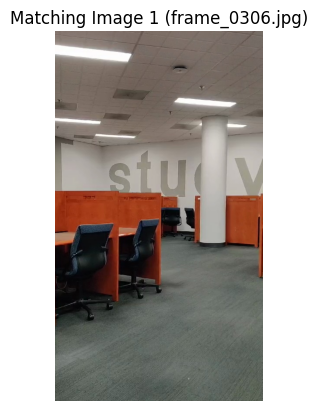

NCC Score: 1.123821552752898


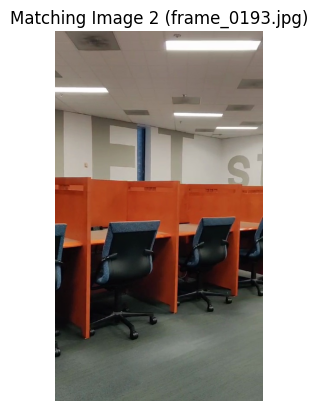

NCC Score: 1.1010409514227524


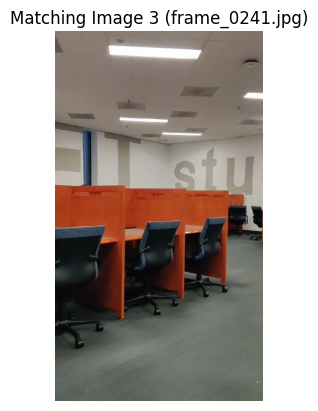

NCC Score: 1.1693924680402314


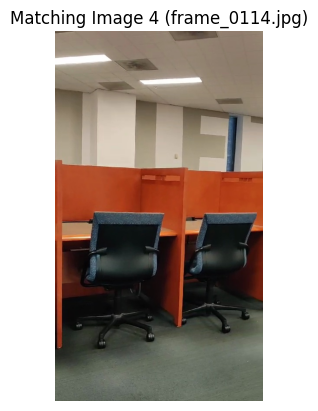

NCC Score: 1.0980092316557317


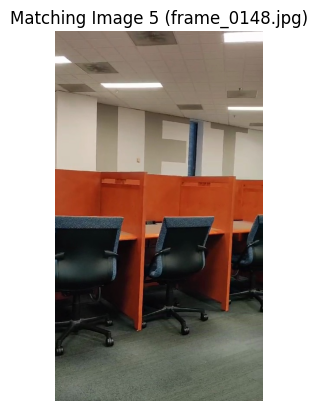

NCC Score: 1.1188954505484578


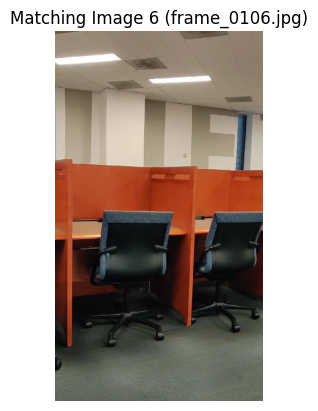

NCC Score: 1.086444397183277


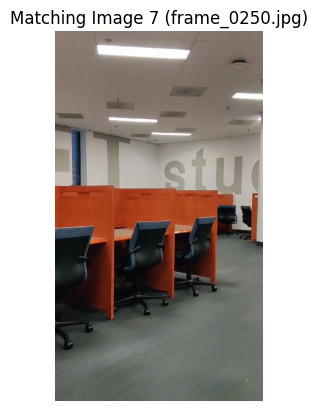

NCC Score: 1.1551193066022358


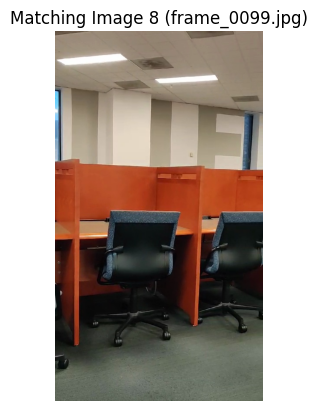

NCC Score: 1.1238297537675368


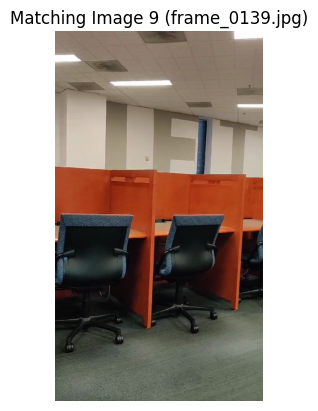

NCC Score: 1.1166538492541982


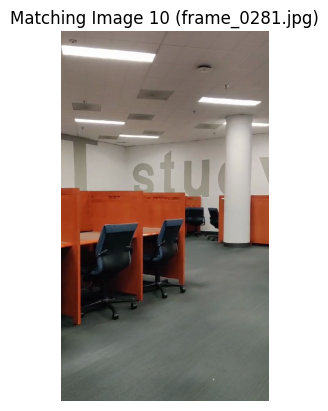

In [2]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# Function to calculate Normalized Cross-Correlation (NCC)
def ncc(img1, img2):
    return np.sum(img1 * img2) / (np.sqrt(np.sum(np.square(img1))) * np.sqrt(np.sum(np.square(img2))))
    
# Load two consecutive frames
def load_consecutive_frames(frame1, frame2):
    return frame1, frame2

# Calculate image gradients
def calculate_gradients(frame1, frame2):
    Ix = cv2.Sobel(frame1, cv2.CV_64F, 1, 0, ksize=5)
    Iy = cv2.Sobel(frame1, cv2.CV_64F, 0, 1, ksize=5)
    It = frame2 - frame1
    return Ix, Iy, It

# Path to the video file
video_path = "SampleVideo.mp4"

# Output folder for storing frames
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)

# Check if the video file can be opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read and store the first two frames from the video
ret, frame1 = cap.read()
ret, frame2 = cap.read()

# Convert frames to grayscale
gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Release the video capture object
cap.release()

# Print the shapes of the frames
print("Shape of Frame 1:", gray_frame1.shape)
print("Shape of Frame 2:", gray_frame2.shape)

# Select ROI from the first frame
roi = cv2.selectROI(gray_frame1)
cv2.destroyAllWindows()

# Crop the selected region from the first frame
roi_template = gray_frame1[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])]

# Print the ROI dimensions
print("ROI Dimensions:", roi_template.shape)

# Calculate image gradients
Ix, Iy, It = calculate_gradients(gray_frame1, gray_frame2)

# Print the shapes of the gradients
print("Shape of Ix:", Ix.shape)
print("Shape of Iy:", Iy.shape)
print("Shape of It:", It.shape)

# Print the gradients at the ROI
print("Gradient Ix at ROI:\n", Ix[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])])
print("Gradient Iy at ROI:\n", Iy[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])])
print("Gradient It at ROI:\n", It[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])])

# Randomly select 10 images for comparison
image_folder = "frames"
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, min(10, len(image_files)))

# Load consecutive frames
frame_index = random.randint(0, len(image_files) - 2)
frame1, frame2 = load_consecutive_frames(cv2.imread(os.path.join(image_folder, image_files[frame_index]), cv2.IMREAD_GRAYSCALE),
                                         cv2.imread(os.path.join(image_folder, image_files[frame_index + 1]), cv2.IMREAD_GRAYSCALE))

# Calculate image gradients
Ix, Iy, It = calculate_gradients(frame1, frame2)

# Threshold for NCC score to consider a match
ncc_threshold = 1.0  # Adjust according to your needs

# Compare the ROI template with each randomly selected image using NCC
for i, image_name in enumerate(random_images):
    image = cv2.imread(os.path.join(image_folder, image_name))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find the region of interest in the image
    roi_image = gray_image[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])]

    # Compute NCC score
    ncc_score = ncc(roi_template, roi_image)
    
    # Display matching images
    if ncc_score > ncc_threshold:
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Matching Image {i+1} ({image_name})")
        print(f"NCC Score: {ncc_score}")
        plt.axis('off')
        plt.show()
